<a href="https://colab.research.google.com/github/Sshubam/FSM_ML_Assignments/blob/main/FSM_2_LinearRegression_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# Loading our Data


---



In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mdf = pd.read_csv("Medical Price Dataset.csv")
mdf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520




---


# Exploratory Data Analysis


---



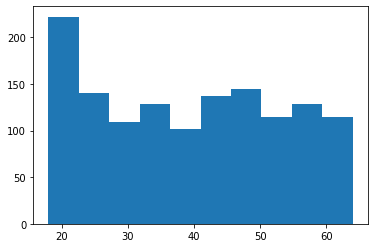

In [3]:
plt.hist(mdf.age)
plt.show()

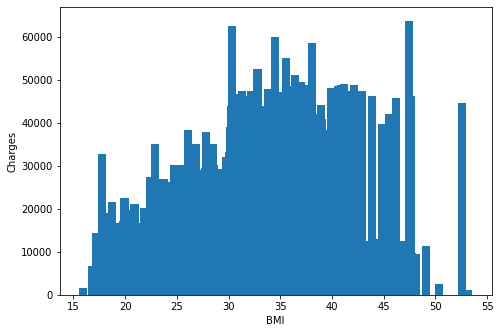

In [4]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = mdf['bmi']
ax.set_xlabel('BMI')
ax.set_ylabel('Charges')
y = mdf['charges']
ax.bar(x,y)
plt.show()

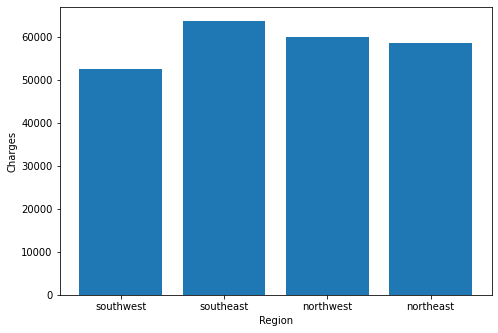

In [5]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(mdf['region'], mdf['charges'])
ax.set_xlabel('Region')
ax.set_ylabel('Charges')
plt.show()

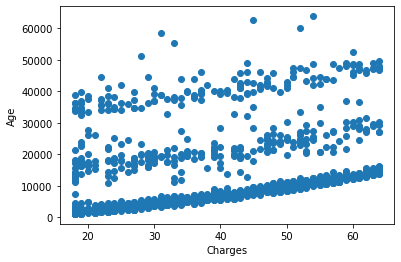

In [6]:
plt.scatter(data=mdf, x="age", y="charges")
plt.xlabel("Charges")
plt.ylabel("Age")
plt.show()

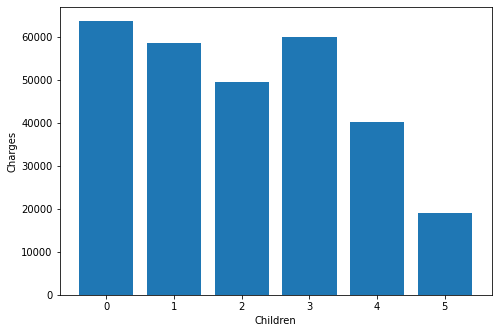

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(mdf['children'], mdf['charges'])
ax.set_xlabel('Children')
ax.set_ylabel('Charges')
plt.show()

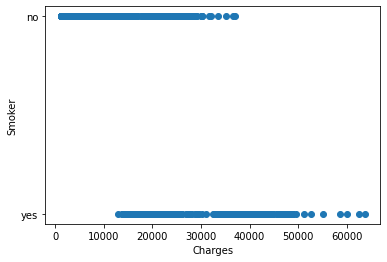

In [8]:
plt.scatter(data=mdf, x="charges", y="smoker")
plt.xlabel("Charges")
plt.ylabel("Smoker")
plt.show()

**From the above Exploratory Data analysis, we can observe the following :** 


*   People having a higher BMI have higher medical charges
*   People are charged regardless of the region
*   Older people have higher medical charges 
*   People with more children generally have lower medical charges
*   Smokers have higher medical charges than non - smokers










---


# Data Preprocessing


---



In [9]:
# Normalizing every datapoint by subracting mean of every data cloumn from every datapoint 
# divided by the standard deviation of the data column to obtain a normal distribution centered 
# around the mean of the data column

mdf['bmi'] = ( mdf['bmi'] - mdf['bmi'].mean() ) / mdf['bmi'].std()
mdf['age'] = ( mdf['age'] - mdf['age'].mean() ) / mdf['age'].std()

# Dropping the region column as people are charged regardless of the region, as observed in our EDA

mdf = mdf.drop(columns=['region'])

In [10]:
mdf

,age,sex,bmi,children,smoker,charges
0,-1.438227,female,-0.453151,0,yes,16884.92400
1,-1.509401,male,0.509431,1,no,1725.55230
2,-0.797655,male,0.383164,3,no,4449.46200
3,-0.441782,male,-1.305043,0,no,21984.47061
4,-0.512957,male,-0.292447,0,no,3866.85520
...,...,...,...,...,...,...
1333,0.768185,male,0.050278,3,no,10600.54830
1334,-1.509401,female,0.206062,0,no,2205.98080
1335,-1.509401,female,1.014499,0,no,1629.83350
1336,-1.295877,female,-0.797515,0,no,2007.94500


In [11]:
mdf = pd.get_dummies(mdf, columns=['smoker', 'sex'])

In [12]:
mdf.head()

,age,bmi,children,charges,smoker_no,smoker_yes,sex_female,sex_male
0,-1.438227,-0.453151,0,16884.92400,0,1,1,0
1,-1.509401,0.509431,1,1725.55230,1,0,0,1
2,-0.797655,0.383164,3,4449.46200,1,0,0,1
3,-0.441782,-1.305043,0,21984.47061,1,0,0,1
4,-0.512957,-0.292447,0,3866.85520,1,0,0,1


In [13]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   float64
 1   bmi         1338 non-null   float64
 2   children    1338 non-null   int64  
 3   charges     1338 non-null   float64
 4   smoker_no   1338 non-null   uint8  
 5   smoker_yes  1338 non-null   uint8  
 6   sex_female  1338 non-null   uint8  
 7   sex_male    1338 non-null   uint8  
dtypes: float64(3), int64(1), uint8(4)
memory usage: 47.2 KB


In [14]:
x = np.array(mdf.loc[:, mdf.columns != 'charges'].values)
y = np.array(mdf['charges'].values)

In [15]:
# Checking x and y dimensions
print(f"x shape : {x.shape}")
print(f"y shape : {y.shape}")

x shape : (1338, 7)
y shape : (1338,)




---


# Linear Regression 


---









Linear Regresssion is an algorithm that assumes that the relation between one or more variables has linear (direct) relation with the value of another variable value.

> For Linear Regression we have the equation: Y = w * x + b, where Y is the predicted value and w is value of weight, b is the value of bias of our trained model and x is the input value


> For minimizing the error between the predicted value and the actual value, we try to minimize the Cost (sum of errors) by using Gradient Descent which finds the weights and biases for when the cost is the lowest



> Learning rate is defined as the rate of change of weights and biases of our model which we set to 0.002



> Epochs is the number of times we want our model to look at the data and improve itself 





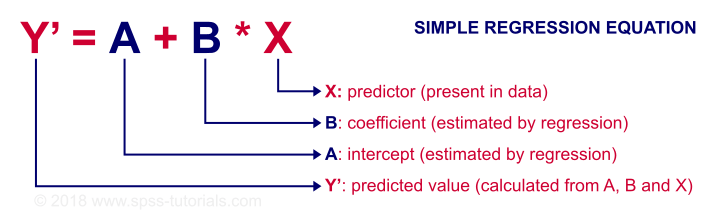


In [16]:
def CostFunction(x, y, weight, bias):
  cost = np.sum((((x.dot(weight) + bias) - y) ** 2) / (2*len(y)))
  return cost

def GradientDescent(x, y, weight, bias, learning_rate, epochs):
  cost_list = [0] * epochs
   
  for epoch in range(epochs):
    z = x.dot(weight) + bias
    loss = z - y
        
    weight_gradient = x.T.dot(loss) / len(y)
    bias_gradient = np.sum(loss) / len(y)
        
    weight = weight - learning_rate * weight_gradient
    bias = bias - learning_rate * bias_gradient
  
    cost = CostFunction(x, y, weight, bias)
    cost_list[epoch] = cost
        
    if (epoch%(epochs / 10) == 0):
      print("Cost :",cost)
        
  return weight, bias, cost_list

In [17]:
# Splitting our data in train and test sets to evaluate our trained model later
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size = 0.3, random_state = 1)

Training process

In [18]:
weight, bias, cost = GradientDescent(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.002,epochs=15000)

Cost : 161248625.64559507
Cost : 29624276.158706702
Cost : 20285043.58728341
Cost : 18657897.394246448
Cost : 18371750.311765
Cost : 18321370.966073886
Cost : 18312498.732577667
Cost : 18310936.140933625
Cost : 18310660.92913074
Cost : 18310612.45710607


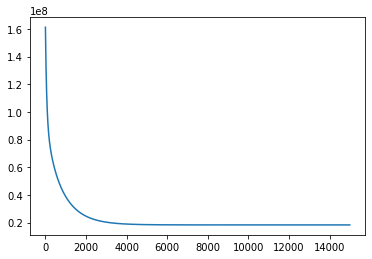

In [19]:
# Plotting our cost curve with respect to epochs, we can observe the cost (errors) reducing as 
# the model optimizes its parameters (weights and biases) with each epoch
plt.plot(cost)
plt.show()

In [20]:
def predict(X, w, b):
  return X.dot(w) + b 
y_pred = predict(Xtest, weight, bias)



---


# Evaluating our model


---



In [21]:
def r2_score(y_pred, y):
  a = np.sum((y_pred - y) ** 2)
  b = np.sum((y - y.mean()) ** 2)  
  r2 = 1 - (a / b)
  return r2
print(f"R2 score of our model is {r2_score(y_pred, Ytest):.2f}")

R2 score of our model is 0.74


In [22]:
def rmse(predictions, targets):
  return np.sqrt(((predictions - targets) ** 2).mean())
print(f"On average our Model is off by ${rmse(y_pred, Ytest):.2f}")

On average our Model is off by $6082.71
